In [6]:
import pandas as pd 
import random
import os
from langchain_groq.chat_models import ChatGroq
from langchain_core.prompts import FewShotPromptTemplate,PromptTemplate
from sklearn.metrics import recall_score,precision_score

In [35]:


from dotenv import load_dotenv
load_dotenv()

Groq_Token = os.getenv("GROQ_API_KEY") # Do not share this key with anyone

groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}

In [8]:
features = pd.read_csv(os.path.join("./UCI HAR Dataset","features.txt"),delim_whitespace=True,header=None)
features

C:\Users\hhp40\AppData\Local\Temp\ipykernel_16192\261447109.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv(os.path.join("./UCI HAR Dataset","features.txt"),delim_whitespace=True,header=None)


,0,1
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [9]:
X_test=pd.read_csv("./UCI HAR Dataset/test/X_test.txt",delim_whitespace=True,header=None)
X_test.columns=features[1]
X_test.reset_index(drop=True)
X_test

C:\Users\hhp40\AppData\Local\Temp\ipykernel_16192\174290902.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test=pd.read_csv("./UCI HAR Dataset/test/X_test.txt",delim_whitespace=True,header=None)


1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [10]:
y_test=pd.read_csv("./UCI HAR Dataset/test/y_test.txt",delim_whitespace=True,header=None)
y_test

C:\Users\hhp40\AppData\Local\Temp\ipykernel_16192\609543338.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test=pd.read_csv("./UCI HAR Dataset/test/y_test.txt",delim_whitespace=True,header=None)


,0
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


In [11]:
def zero_shot(n_features,model_name):
    test_predictions=[]
    features_string=','.join((features[1][:n_features].astype(str).to_list()))
    llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
    for i,data in X_test[:500].iterrows():
        sentence=','.join(X_test.iloc[i][:n_features].astype(str).to_list())
        system_prompt = f"""
        * You are a classifier. 
        * Your task is to classify human activities based on the featurized accelerometer data. 
        * The activities are WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING and LAYING.
        * Answer only in one word.
        * The features provided are in the following order seperated by a comma :
        {features_string}

        Query: {sentence}
        """ 
        ans=llm.invoke(system_prompt)
        print(i)
        test_predictions.append(ans.content)

    pred=pd.DataFrame(test_predictions)
    pred.to_csv(f"zero_shot_{n_features}_{model_name}.csv")
    return pred

In [12]:
X_train=pd.read_csv("./UCI HAR Dataset/train/X_train.txt",delim_whitespace=True,header=None)
X_train.columns=features[1]
X_train.reset_index(drop=True)
X_train

C:\Users\hhp40\AppData\Local\Temp\ipykernel_16192\273291808.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train=pd.read_csv("./UCI HAR Dataset/train/X_train.txt",delim_whitespace=True,header=None)


1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [13]:
y_train=pd.read_csv("./UCI HAR Dataset/train/y_train.txt",delim_whitespace=True,header=None)
y_train

C:\Users\hhp40\AppData\Local\Temp\ipykernel_16192\1692933782.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train=pd.read_csv("./UCI HAR Dataset/train/y_train.txt",delim_whitespace=True,header=None)


,0
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [14]:
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

In [15]:
y_train_mapping=y_train[0].map(ACTIVITIES)

In [16]:
def create_few_shot_examples(n_features):

    unique_values = y_train_mapping.unique()[1:]
    results=[]
    # Iterate through each unique value
    for value in unique_values:
        # Get the indexes and values for the current unique value
        value_indexes = y_train_mapping.index[y_train_mapping== value].tolist()
        value_values = y_train_mapping[y_train_mapping == value].tolist()
        
        # Take only the first 5 indexes and values
        value_indexes = value_indexes[:5]
        value_values = value_values[:5]
        
        # Store the results as a tuple (value, indexes, values)
        results.append((value, value_indexes, value_values))

    # Print the results
    for result in results:
        value, indexes, values = result
        print(f"Value: {value}, Indexes: {indexes}, Values: {values}")
    few_shot_examples = []
    for i in range(5):
        for n in results[i][1]:
            example = {
                "query": ','.join(X_train.iloc[n][:n_features].astype(str).to_list()),  
                "answer": y_train_mapping.iloc[n] 
            }
            few_shot_examples.append(example)
    random.shuffle(few_shot_examples)
    return few_shot_examples


In [18]:

def few_shot(n_features,model_name):
    few_shot_examples=create_few_shot_examples(n_features)
    test_predictions=[]
    features_string=','.join((features[1][:n_features].astype(str).to_list()))
    llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
    system_prompt = f"""
        * You are a classifier. 
        * Your task is to classify human activities based on the featurized accelerometer data. 
        * The activities are WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING and LAYING.
        * Answer only in one word.
        * The features provided are in the following order seperated by a comma :
        {features_string}
    """ 
    example_prompt = PromptTemplate(
        input_variables=["query", "answer"], template="Question: {query}\n{answer}"
    )

    # Define the features and create a few-shot prompt

    few_shot_prompt = FewShotPromptTemplate(
        examples=few_shot_examples,
        example_prompt=example_prompt,
        prefix=system_prompt,
        suffix="Based on these examples, classify the following activity:\n Question :{sentence}",
        input_variables=['sentence']
    )
    
    for i, data in X_test[:500].iterrows():
        sentence = ",".join(X_test.iloc[i][:n_features].astype(str).to_list())
        prompt = few_shot_prompt.format(sentence=sentence)
        ans = llm.invoke(prompt)
        print(i)
        test_predictions.append(ans.content)

    pred=pd.DataFrame(test_predictions)
    pred.to_csv(f"few_shot_{n_features}_{model_name}.csv")
    return pred



Q1

In [26]:
zero_shot(6,"llama3-70b")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,0
0,WALKING
1,WALKING
2,WALKING
3,WALKING
4,WALKING
...,...
495,WALKING
496,WALKING
497,WALKING
498,WALKING


In [27]:
zero_shot(3,"gemma-7b")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,0
0,WALKING
1,WALKING
2,WALKING
3,WALKING
4,WALKING
...,...
495,WALKING
496,WALKING
497,WALKING
498,WALKING


In [30]:
few_shot(3,"gemma-7b")

Value: SITTING, Indexes: [27, 28, 29, 30, 31], Values: ['SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING']
Value: LAYING, Indexes: [51, 52, 53, 54, 55], Values: ['LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING']
Value: WALKING, Indexes: [78, 79, 80, 81, 82], Values: ['WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING']
Value: WALKING_DOWNSTAIRS, Indexes: [125, 126, 127, 128, 129], Values: ['WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS']
Value: WALKING_UPSTAIRS, Indexes: [150, 151, 152, 153, 154], Values: ['WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS']
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107

,0
0,WALKING
1,WALKING
2,WALKING
3,WALKING
4,WALKING_UPSTAIRS
...,...
495,WALKING
496,WALKING
497,WALKING
498,WALKING


In [46]:
z_s=pd.read_csv("zero_shot/zero_shot_3_llama3-70b.csv")
f_s=pd.read_csv("few_shot/few_shot_3_llama3-70b.csv")
z_s1=pd.read_csv("zero_shot/zero_shot_6_llama3-70b")
f_s1=pd.read_csv("few_shot/few_shot_3_gemma-7b")
z_s2=pd.read_csv("zero_shot/zero_shot_3_gemma-7b")


In [59]:
z_s_fifteen=pd.read_csv("zero_shot/zero_shot_15_llama3-70b.csv")
f_s_na=pd.read_csv("few_shot/few_shot_new_activity.csv")

In [48]:
ACTIVITIES_INV = {
    'WALKING':1           ,
    'WALKING_UPSTAIRS':2 ,
    'WALKING_DOWNSTAIRS':3,
    'SITTING':4        ,
    'STANDING':5          ,
    'LAYING':6           ,
}

In [49]:
z_s_new=z_s['0'].map(ACTIVITIES_INV)
f_s_new=f_s['0'].map(ACTIVITIES_INV)
z_s1=z_s1['0'].map(ACTIVITIES_INV)
f_s1=f_s1['0'].map(ACTIVITIES_INV)
z_s2=z_s2['0'].map(ACTIVITIES_INV)


In [60]:
z_s_fifteen1=z_s_fifteen['0'].map(ACTIVITIES_INV)
z_s_fifteen1=z_s_fifteen1.fillna(0).astype(int)
f_s_na1=f_s_na['0'].map(ACTIVITIES_INV)

In [232]:
matches=(f_s_new==y_test[0][:500]).sum()
print(matches)
accuracy = matches.sum() / 500
recall=recall_score(y_test[0][:500],f_s_new,average='macro')
precision=precision_score(y_test[0][:500],f_s_new,average='macro')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

138
Accuracy: 27.60%
Recall: 0.24
Precision: 0.27


In [233]:
f_s_new.value_counts()

5    230
1    126
4     55
3     55
6     22
2     12
Name: 0, dtype: int64

In [234]:
matches=(z_s_new[:500]==y_test[0][:500]).sum()
print(matches)
accuracy = matches.sum() / 500
recall=recall_score(y_test[0][:500],z_s_new[:500],average='macro')
precision=precision_score(y_test[0][:500],z_s_new[:500],average='macro')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

90
Accuracy: 18.00%
Recall: 0.17
Precision: 0.03


c:\Users\hhp40\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [235]:
z_s_new.value_counts()

1    500
5      6
Name: 0, dtype: int64

In [238]:
matches=(z_s_fifteen1==y_test[0][:500]).sum()
print(matches)
accuracy = matches.sum() / 500
recall=recall_score(y_test[0][:500],z_s_fifteen1,average='macro')
precision=precision_score(y_test[0][:500],z_s_fifteen1,average='macro')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

89
Accuracy: 17.80%
Recall: 0.14
Precision: 0.03


c:\Users\hhp40\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hhp40\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [239]:
z_s_fifteen1.value_counts()

1    499
0      1
Name: 0, dtype: int64

In [50]:
matches=(z_s1==y_test[0][:500]).sum()
print(matches)
accuracy = matches.sum() / 500
recall=recall_score(y_test[0][:500],z_s1,average='macro')
precision=precision_score(y_test[0][:500],z_s1,average='macro')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

90
Accuracy: 18.00%
Recall: 0.17
Precision: 0.03


c:\Users\hhp40\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
matches=(f_s1==y_test[0][:500]).sum()
print(matches)
accuracy = matches.sum() / 500
recall=recall_score(y_test[0][:500],f_s1,average='macro')
precision=precision_score(y_test[0][:500],f_s1,average='macro')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

85
Accuracy: 17.00%
Recall: 0.18
Precision: 0.06


c:\Users\hhp40\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
matches=(z_s2==y_test[0][:500]).sum()
print(matches)
accuracy = matches.sum() / 500
recall=recall_score(y_test[0][:500],z_s2,average='macro')
precision=precision_score(y_test[0][:500],z_s2,average='macro')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

90
Accuracy: 18.00%
Recall: 0.17
Precision: 0.03


c:\Users\hhp40\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Q2

In [199]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [245]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test[:500])

Accuracy: 0.87
Precision: 0.87
Recall: 0.87


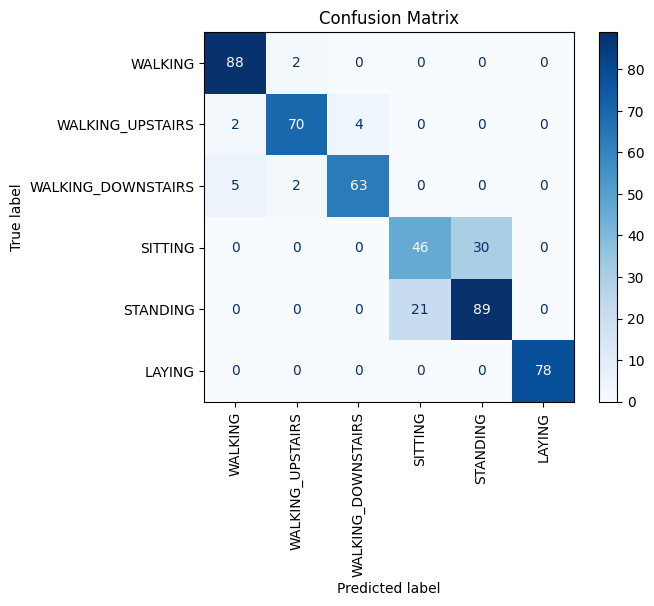

In [246]:
accuracy = accuracy_score(y_test[:500], y_pred)
precision = precision_score(y_test[:500], y_pred, average='weighted')
recall = recall_score(y_test[:500], y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test[:500], y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ACTIVITIES.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

Q3
Zero-Shot Learning (ZSL) and Few-Shot Learning (FSL) both have limitations when applied to classifying human activities based on featurized accelerometer data:

1. **Zero-Shot Learning (ZSL) Limitations**:
   - **Lack of Prior Knowledge**: ZSL assumes that the model can infer new classes without any prior examples, which is challenging with accelerometer data due to the variability and complexity of human activities. The model might struggle to generalize from known classes to unseen ones without sufficient semantic context or related features.

   - **Feature Discrepancies**: In ZSL, the unseen activities might have feature distributions that are significantly different from those of the seen activities, making it difficult for the model to map them correctly using only the auxiliary information.

2. **Few-Shot Learning (FSL) Limitations**:
   - **Limited Data**: Although FSL is designed to work with few examples, accelerometer data can be noisy and context-dependent. A small number of samples may not capture the full variability of an activity, leading to poor generalization.

   - **Overfitting Risk**: With very few examples, the model might overfit to the provided data, especially if the activities have subtle differences that require more data to distinguish effectively.


Q4

When tested with a completely unseen activity, the few-shot model demonstrated the ability to classify the features as the unseen activity. Specifically, the model was able to identify the activity "standing," which was not part of the provided training data. Out of five predictions where the model classified the features as "standing," four predictions were correct. 

In [61]:
matches=(f_s_na1==y_test[0][:500]).sum()
print(matches)
accuracy = matches.sum() / 500
recall=recall_score(y_test[0][:500],f_s_na1,average='macro')
precision=precision_score(y_test[0][:500],f_s_na1,average='macro')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

134
Accuracy: 26.80%
Recall: 0.27
Precision: 0.28


In [62]:
f_s_na1.value_counts()

0
1    227
6    191
4     35
3     26
2     16
5      5
Name: count, dtype: int64

In [63]:
compare=f_s_na['0'][f_s_na['0']=='STANDING'].to_dict()
count=0
for i in compare:
    if(y_test[0][i]==5):
        count=count+1
print(count)


4


In [64]:
y_test[:500].value_counts()

0
5    110
1     90
6     78
2     76
4     76
3     70
Name: count, dtype: int64

Q5

In [2]:
import random
indices=random.sample(range(2000), 500)

In [39]:

test_predictions=[]
n_features=3
model_name="llama3-70b"
features_string=','.join((features[1][:n_features].astype(str).to_list()))
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)



   

In [40]:
for i in range(len(indices)):
    sentence=','.join(X_test.iloc[indices[i]][:n_features].astype(str).to_list())
    system_prompt = f"""
    * You are a classifier. 
    * Your task is to classify human activities based on the featurized accelerometer data. 
    * The activities are WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING and LAYING.
    * Answer only in one word.
    * The features provided are in the following order seperated by a comma :
    {features_string}

    Query: {sentence}
    """ 
    ans=llm.invoke(system_prompt)
    print(i)
    test_predictions.append(ans.content)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [41]:
pred=pd.DataFrame(test_predictions)
pred.to_csv(f"zero_shot_{n_features}_{model_name}_random.csv")

In [65]:
pred.to_json(f"zero_shot_{n_features}_{model_name}_random")

In [66]:

few_shot_examples=create_few_shot_examples(n_features)
test_predictions=[]
n_features=3
model_name="llama3-70b"
features_string=','.join((features[1][:n_features].astype(str).to_list()))
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
system_prompt = f"""
    * You are a classifier. 
    * Your task is to classify human activities based on the featurized accelerometer data. 
    * The activities are WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING and LAYING.
    * Answer only in one word.
    * The features provided are in the following order seperated by a comma :
    {features_string}
""" 
example_prompt = PromptTemplate(
    input_variables=["query", "answer"], template="Question: {query}\n{answer}"
)

# Define the features and create a few-shot prompt

few_shot_prompt = FewShotPromptTemplate(
    examples=few_shot_examples,
    example_prompt=example_prompt,
    prefix=system_prompt,
    suffix="Based on these examples, classify the following activity:\n Question :{sentence}",
    input_variables=['sentence']
)







Value: SITTING, Indexes: [27, 28, 29, 30, 31], Values: ['SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING']
Value: LAYING, Indexes: [51, 52, 53, 54, 55], Values: ['LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING']
Value: WALKING, Indexes: [78, 79, 80, 81, 82], Values: ['WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING']
Value: WALKING_DOWNSTAIRS, Indexes: [125, 126, 127, 128, 129], Values: ['WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS']
Value: WALKING_UPSTAIRS, Indexes: [150, 151, 152, 153, 154], Values: ['WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS']


In [72]:
for i in range(198,len(indices)):
    sentence = ",".join(X_test.iloc[indices[i]][:n_features].astype(str).to_list())
    prompt = few_shot_prompt.format(sentence=sentence)
    ans = llm.invoke(prompt)
    print(i)
    test_predictions.append(ans.content)

198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447


In [89]:

pred=pd.DataFrame(test_predictions)
pred.to_csv(f"few_shot_{n_features}_{model_name}_random.csv")

In [91]:
f_s_random=pd.read_csv("few_shot_3_llama3-70b_random.csv")
z_s_random=pd.read_csv("zero_shot_3_llama3-70b_random.csv")

In [92]:
f_s_random['0']

0               SITTING
1               WALKING
2               WALKING
3               WALKING
4               WALKING
             ...       
495             WALKING
496              LAYING
497    WALKING_UPSTAIRS
498             WALKING
499             WALKING
Name: 0, Length: 500, dtype: object

In [77]:
test=[]
for i in indices:
    test.append(y_test[0][i])

In [80]:
y_test_random=pd.DataFrame(test)[0].map(ACTIVITIES)
y_test_random.reset_index(drop=True)
y_test_random

0        WALKING_UPSTAIRS
1                  LAYING
2                 WALKING
3                 SITTING
4                STANDING
              ...        
495      WALKING_UPSTAIRS
496               WALKING
497    WALKING_DOWNSTAIRS
498               WALKING
499    WALKING_DOWNSTAIRS
Name: 0, Length: 500, dtype: object

In [95]:
matches=(f_s_random['0']==y_test_random).sum()
print(matches)
accuracy = matches.sum() / 500
recall=recall_score(y_test_random,f_s_random['0'],average='macro')
precision=precision_score(y_test_random,f_s_random['0'],average='macro')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

88
Accuracy: 17.60%
Recall: 0.17
Precision: 0.13


c:\Users\hhp40\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
matches=(z_s_random['0']==y_test_random).sum()
print(matches)
accuracy = matches.sum() / 500
recall=recall_score(y_test_random,z_s_random['0'],average='macro')
precision=precision_score(y_test_random,z_s_random['0'],average='macro')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

91
Accuracy: 18.20%
Recall: 0.16
Precision: 0.03


c:\Users\hhp40\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
